In [1]:
import os
import pickle
from dassl.data.datasets import Datum
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances

In [8]:
fpath = "output/base2new/train_base/eurosat/shots_-1/ALVLM_DoCoCoOp_clustering/vit_b16_one_time_gamma_20/seed4"

with open(os.path.join(fpath, "img_features.pkl"), "rb") as f:
    img_features = pickle.load(f)

with open(os.path.join(fpath, "sample_idx.pkl"), "rb") as f:
    sample_idx = pickle.load(f)

tsne_model = TSNE(n_components=2, perplexity=30, n_iter=300, random_state=42)
embedding = tsne_model.fit_transform(img_features)

In [19]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(img_features)

# 重心から近い順にサンプリング
distances = pairwise_distances(kmeans.cluster_centers_, img_features)
cluster_counts = Counter(kmeans.labels_)
sample_idx = []

GAMMA = 0.1

for cluster_id, d in enumerate(distances):
    d_minid = np.argsort(d)
    d_minid = d_minid[:int(cluster_counts[cluster_id] * GAMMA)]
    sample_idx.extend(d_minid.tolist())
    print(len(d_minid))
sample_idx_trans = np.array(list(set(sample_idx)))

# 重複を取り除く
sample_idx_trans = list(dict.fromkeys(sample_idx_trans))
sample_idx_trans = np.array(sample_idx_trans)

/home/yhiro/miniconda3/envs/dassl/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


130
176
112
105
176


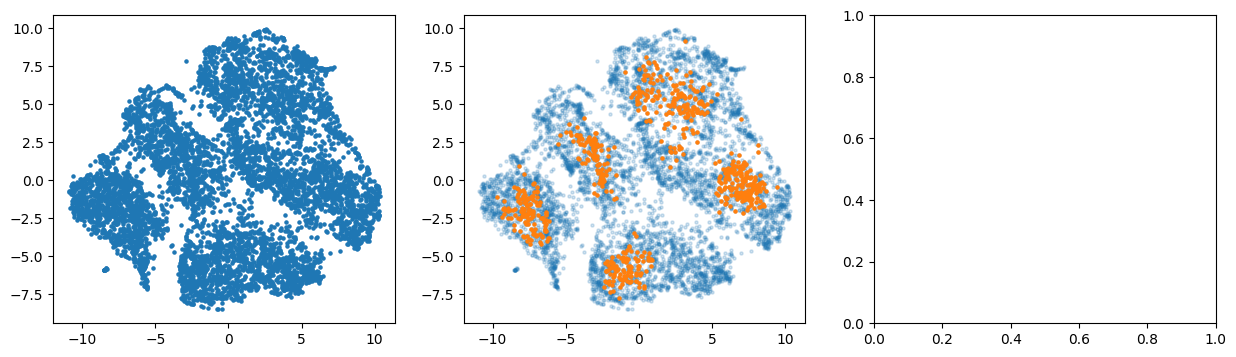

In [20]:
fig, ax = plt.subplots(1, 3, figsize=(15,4))
ax.ravel()

ax[0].scatter(embedding[:, 0], embedding[:, 1], s=5)
ax[1].scatter(embedding[:, 0], embedding[:, 1], s=5, alpha=0.2)
ax[1].scatter(embedding[sample_idx_trans, 0], embedding[sample_idx_trans, 1], s=5)


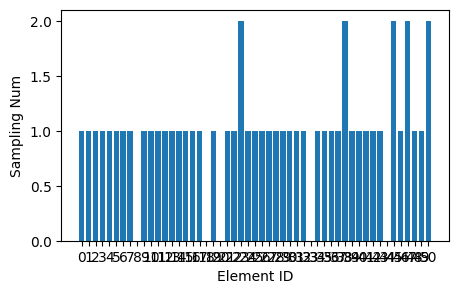

In [14]:
import re
import matplotlib.pyplot as plt

dataset = "oxford_flowers"
model = "ALVLM_DoCoCoOp_clustering_one_sample"
#model = "ALVLM_DoCoCoOp_random"
#model = "ALVLM_DoCoCoOp_badge"
#model = "ALVLM_DoCoCoOp_entropy"


#cfg = "vit_b16_one_time_gamma_20"
#cfg = "vit_b16_one_time"
cfg = "vit_b16_one_time_one_sample"

#cfg = "vit_b16"


file_path =  f"output/base2new/train_base/{dataset}/shots_-1/{model}/{cfg}/seed1/log.txt"


with open(file_path, 'r') as f:
    content = f.read()
    # 正規表現を使用してaccuracyを抽出
    content = content.replace("\n", " ")
    match = re.findall(r'tensor\(\[.*?\]\)', content)[-1]
    numbers = re.findall(r'[\d\.\d]+', match)
    numbers = [float(num) for num in numbers]

plt.figure(figsize=(5, 3))
plt.bar(range(len(numbers)), numbers, tick_label=range(len(numbers)))
plt.xlabel('Element ID')
plt.ylabel('Sampling Num')
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, davies_bouldin_score, calinski_harabasz_score
from sklearn.datasets import make_blobs
from sklearn.manifold import TSNE

# サンプルデータの作成（256次元, クラスタごとの凝集度を変える）
n_samples = 1000
n_features = 256
n_clusters = 4
random_state = 42

# クラスタごとの分散（標準偏差）を変えてクラスタを作成
cluster_std = [0.5, 1.0, 2.0, 3.0]  # クラスタごとの凝集度（小さいほど密集）
X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, cluster_std=cluster_std, random_state=random_state)

# k-means クラスタリング
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, n_init=10)
labels = kmeans.fit_predict(X)

# クラスタ評価指標の計算
silhouette_values = silhouette_samples(X, labels)
cluster_silhouette_scores = {i: silhouette_values[labels == i].mean() for i in range(n_clusters)}

# tsne
tsne = TSNE(n_components=2, random_state=random_state)
X_tsne = tsne.fit_transform(X)

# クラスタリング結果のプロット
print(f"Silhouette Score: {cluster_silhouette_scores}")
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', s=50, alpha=0.6, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='x', label='Centroids')
plt.title("K-Means Clustering Results")
plt.legend()
plt.show()


In [16]:
X[0]

array([  9.51114078,   4.55727031,   0.26010166,  -7.90426012,
         2.59076496,  10.98587619,  -7.60561219,  -0.15885162,
         8.07089724,   4.28459149,   4.60512546,   4.28213715,
        -4.54175981,  -4.38146459,   6.39840854,   6.9099513 ,
         6.83931263,   7.44363716,  -0.62722369,   0.2212846 ,
         5.99555189,   2.30404711,   4.48600791,   6.12153305,
         7.21834247,  -3.81910616,  -0.75408593, -10.27012291,
         0.0353276 ,  -9.48977145,   0.29585654,  -0.01563625,
        -3.69024326,   0.05351923,  -9.64695038,  -8.95246499,
         7.31251135,  -2.19588142,  -9.34182404,   0.45510031,
         4.68149144,  -5.79021328,   2.14285251,  -7.60084918,
        -8.99600712,   0.87040424,   0.87389077,   0.53023255,
         4.55948362,   9.47788821,   0.81319361,  -3.07690745,
         4.10020463,  -5.67096859,  -1.14041651,  -7.88846038,
        -9.80775659,   9.7621398 ,   8.67801224,   4.42032619,
        -0.42951051,  -6.80759427,  -6.25062452,  -3.97

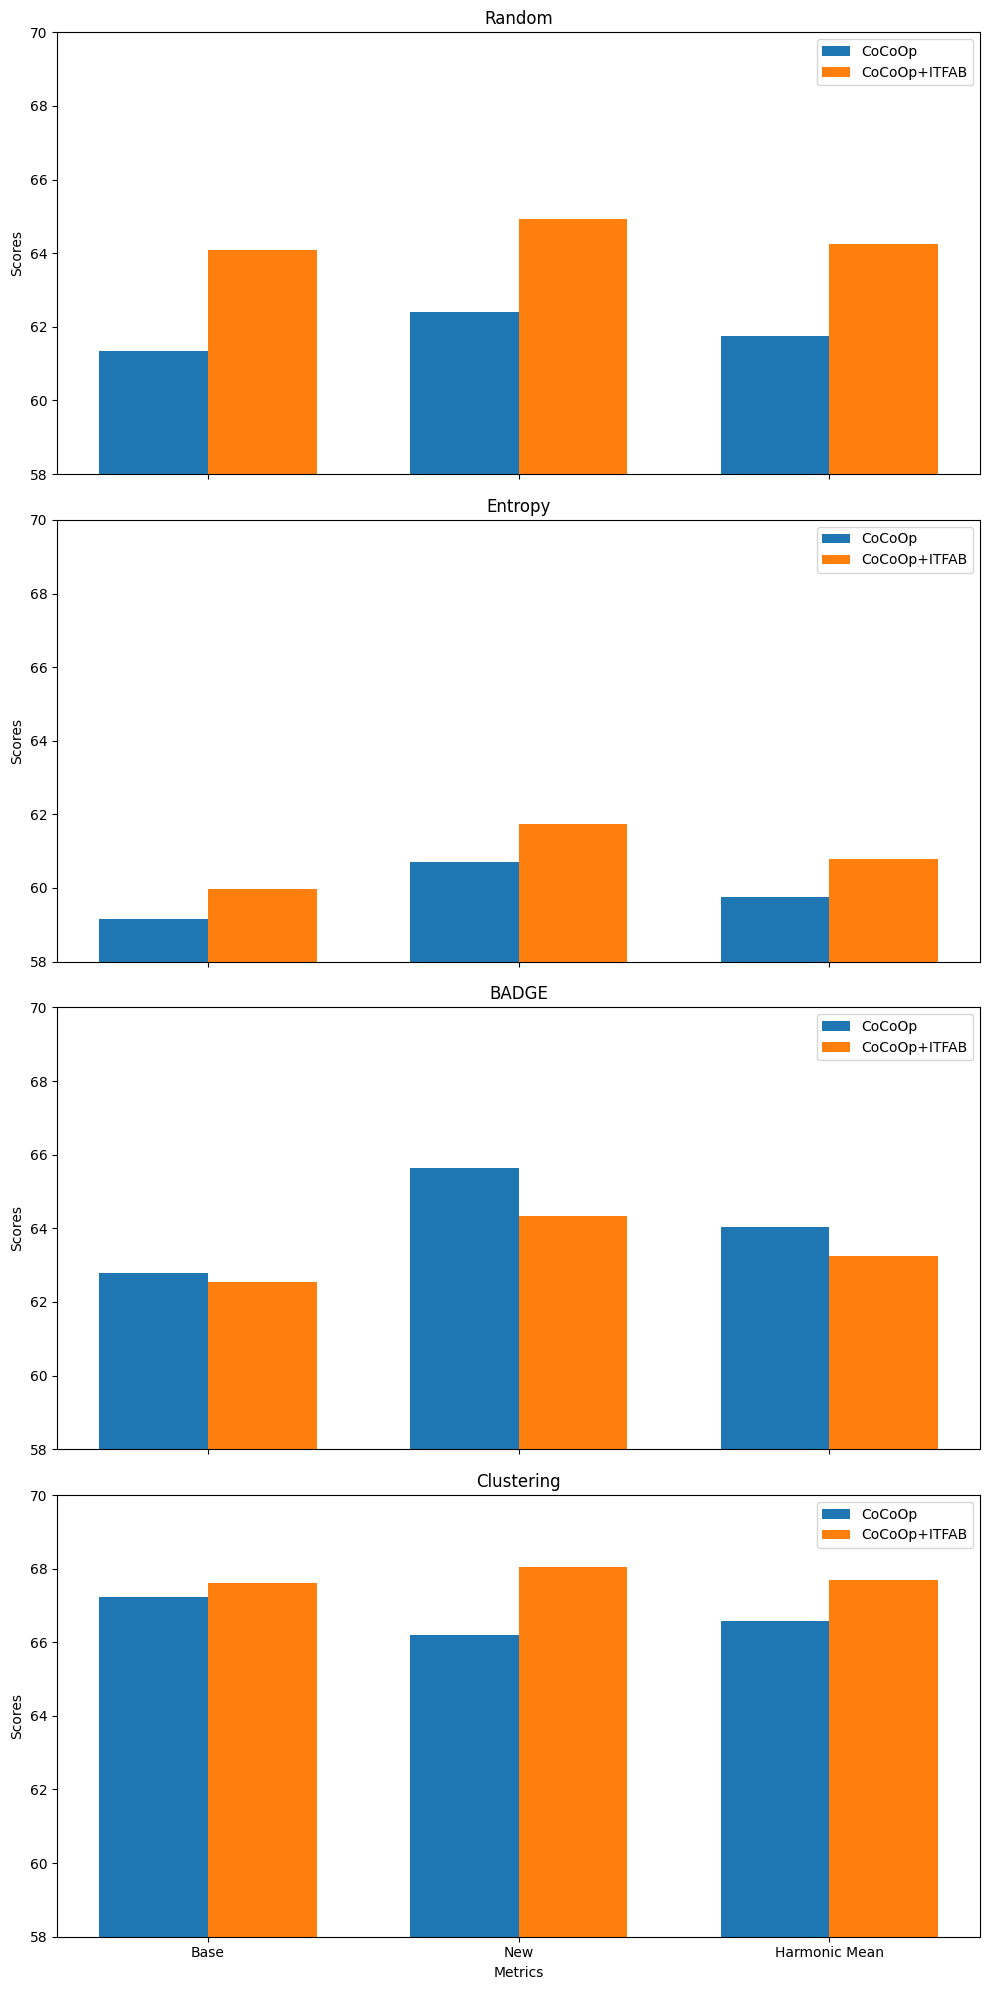

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# New data for the models
methods = ['Random', 'Entropy', 'BADGE', 'Clustering']
models = ['CoCoOp', 'CoCoOp+ITFAB']
metrics = ['Base', 'New', 'Harmonic Mean']

# Scores for each model and method
data_new = {
    'Random': {
        'CoCoOp': [61.34, 62.39, 61.75],
        'CoCoOp+ITFAB': [64.08, 64.94, 64.25]
    },
    'Entropy': {
        'CoCoOp': [59.16, 60.71, 59.75],
        'CoCoOp+ITFAB': [59.97, 61.73, 60.78]
    },
    'BADGE': {
        'CoCoOp': [62.79, 65.63, 64.04],
        'CoCoOp+ITFAB': [62.53, 64.34, 63.26]
    },
    'Clustering': {
        'CoCoOp': [67.22, 66.20, 66.59],
        'CoCoOp+ITFAB': [67.62, 68.04, 67.68]
    }
}

# Plotting the data
fig, axs = plt.subplots(4, 1, figsize=(10, 20), sharex=True)

x = np.arange(len(metrics))
width = 0.35

# Set y-axis limits to improve visibility
y_min, y_max = 58, 70

for idx, method in enumerate(methods):
    ax = axs[idx]
    model_cocoop_scores = data_new[method]['CoCoOp']
    model_cocoop_itfab_scores = data_new[method]['CoCoOp+ITFAB']
    
    ax.bar(x - width/2, model_cocoop_scores, width, label='CoCoOp')
    ax.bar(x + width/2, model_cocoop_itfab_scores, width, label='CoCoOp+ITFAB')
    
    ax.set_ylim(y_min, y_max)
    ax.set_title(method)
    ax.set_ylabel('Scores')
    ax.set_xticks(x)
    ax.set_xticklabels(metrics)
    ax.legend()

axs[-1].set_xlabel('Metrics')

plt.tight_layout()
plt.show()


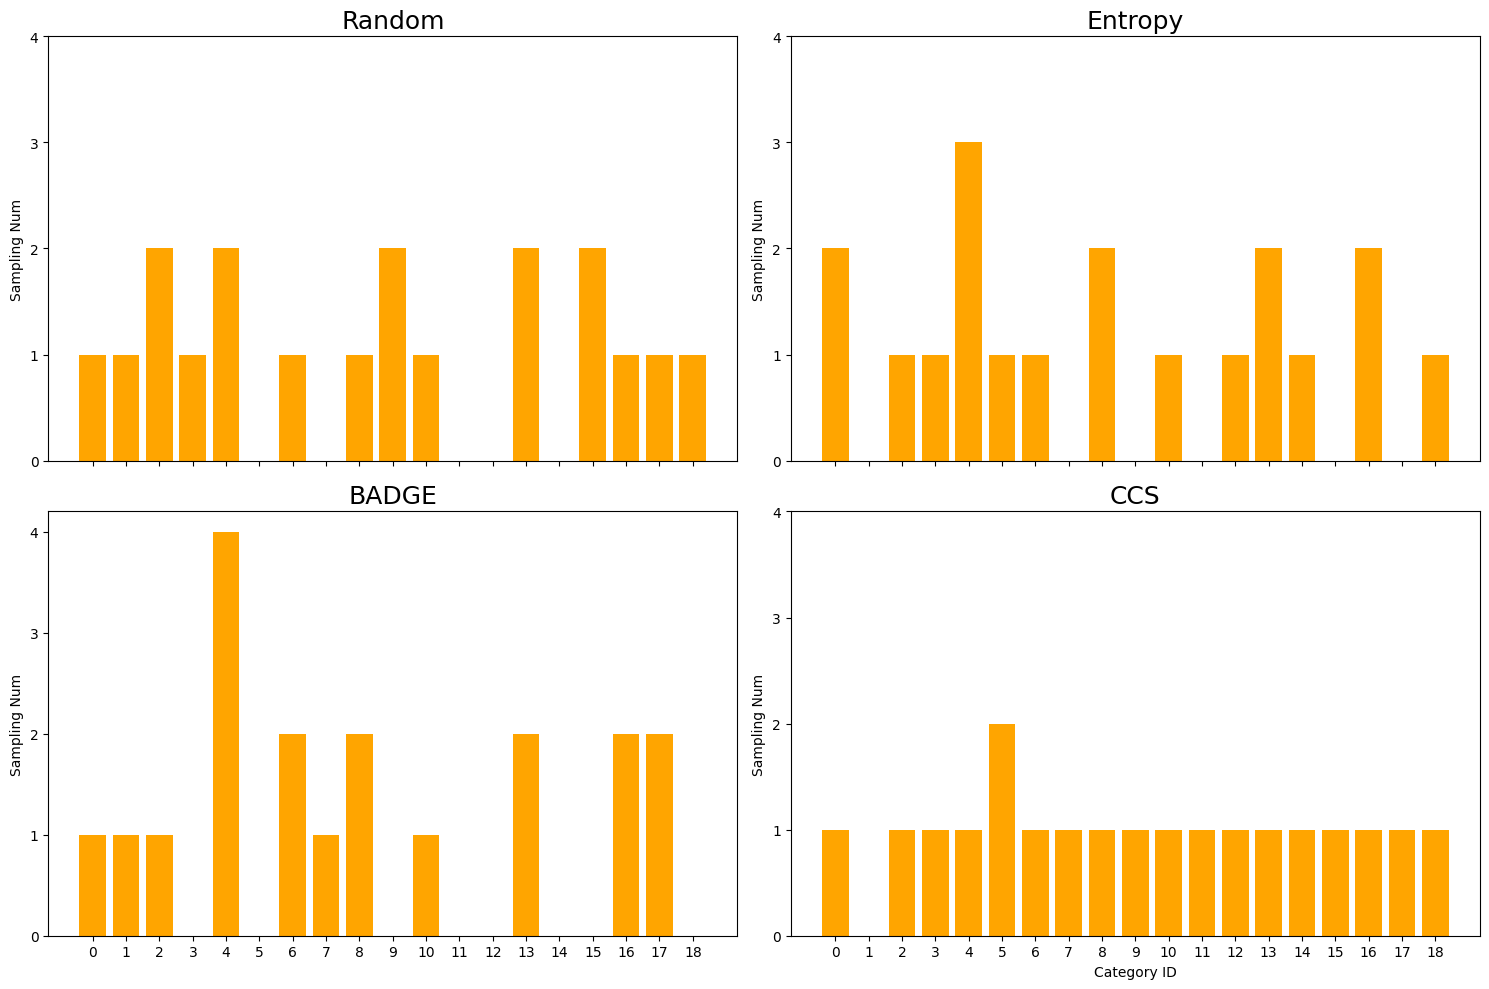

In [3]:
import matplotlib.pyplot as plt

# Recreate the data
element_id = list(range(19))
random = [1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 1]
entropy = [2, 0, 1, 1, 3, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1]
badge = [1, 1, 1, 0, 4, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0]
ccs = [1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

all = random+entropy+badge+ccs

fig, axs = plt.subplots(2, 2, figsize=(15, 10), sharex=True)

# Plotting each method
axs[0, 0].bar(element_id, random, color='orange')
axs[0, 0].set_title('Random', fontsize=18)
axs[0, 0].set_ylabel('Sampling Num')
axs[0, 0].set_yticks(range(0, max(all) + 1))

axs[0, 1].bar(element_id, entropy, color='orange')
axs[0, 1].set_title('Entropy', fontsize=18)
axs[0, 1].set_ylabel('Sampling Num')
axs[0, 1].set_yticks(range(0, max(all) + 1))

axs[1, 0].bar(element_id, badge, color='orange')
axs[1, 0].set_title('BADGE', fontsize=18)
axs[1, 0].set_ylabel('Sampling Num')
axs[1, 0].set_yticks(range(0, max(all) + 1))

axs[1, 1].bar(element_id, ccs, color='orange')
axs[1, 1].set_title('CCS', fontsize=18)
axs[1, 1].set_xlabel('Category ID')
axs[1, 1].set_ylabel('Sampling Num')
axs[1, 1].set_yticks(range(0, max(all) + 1))

# Adjusting x-axis ticks and labels
plt.xticks(element_id, element_id)

plt.tight_layout()
plt.show()


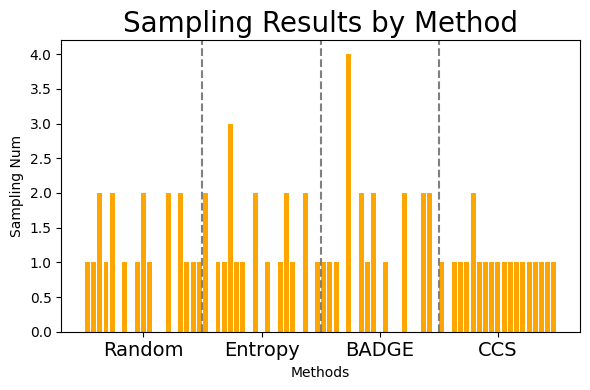

In [12]:
# Combine all data into one plot with vertical lines between the results

# Offsets for different categories
offset = len(element_id)
positions = element_id + [x + offset for x in element_id] + [x + 2 * offset for x in element_id] + [x + 3 * offset for x in element_id]

# Combine all data
combined_data = random + entropy + badge + ccs
labels = ['Random'] * len(element_id) + ['Entropy'] * len(element_id) + ['BADGE'] * len(element_id) + ['CCS'] * len(element_id)

fig, ax = plt.subplots(figsize=(6, 4))

# Plotting the data
ax.bar(positions, combined_data, color='orange')

# Adding vertical lines between different result sets
ax.axvline(x=offset - 0.5, color='gray', linestyle='--')
ax.axvline(x=2 * offset - 0.5, color='gray', linestyle='--')
ax.axvline(x=3 * offset - 0.5, color='gray', linestyle='--')

# Set labels and title
ax.set_ylabel('Sampling Num')
ax.set_xlabel('Methods')
ax.set_title('Sampling Results by Method', fontsize=20)

# Set custom ticks
ax.set_xticks([offset / 2 - 0.5, 1.5 * offset - 0.5, 2.5 * offset - 0.5, 3.5 * offset - 0.5])
ax.set_xticklabels(['Random', 'Entropy', 'BADGE', 'CCS'], fontsize=14)

plt.tight_layout()
plt.show()


/home/yhiro/miniconda3/envs/dassl/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


24


ValueError: 'c' argument has 1440 elements, which is inconsistent with 'x' and 'y' with size 1464.

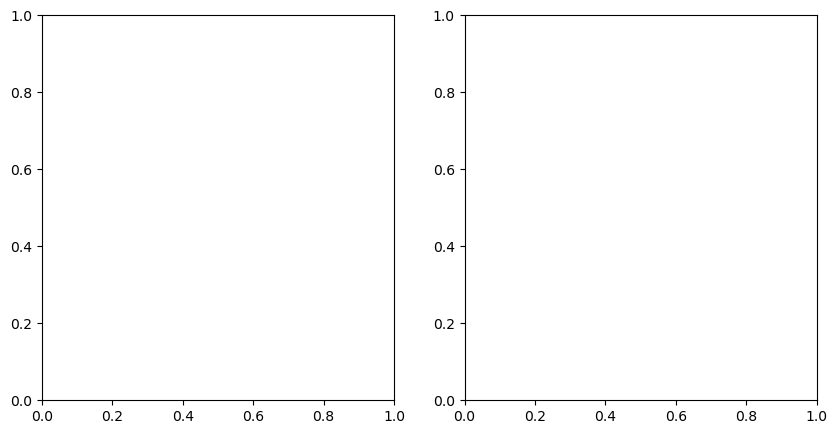

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.manifold import TSNE
import torch

path_imgfeat = "output/img_features_dtd_base.pkl"
path_qurypath = "output/query_impath_random.txt"
#path_qurypath = "output/query_impath_entropy.txt"
path_imglabel = "output/img_labels_dtd_base.pkl"
path_imgpath = "output/img_paths_dtd_base.pkl"

# read query_impath.txt
with open(path_qurypath, "r") as f:
    query_impath = f.readlines()
query_impath = [q.strip() for q in query_impath]

# read img_features.pkl
with open(path_imgfeat, "rb") as f:
    img_features = pickle.load(f)
with open(path_imglabel, "rb") as f:
    img_labels = pickle.load(f)
with open(path_imgpath, "rb") as f:
    img_paths = pickle.load(f)

img_features = torch.stack(img_features).squeeze().detach().cpu()
img_features = np.array(img_features)
img_labels = torch.stack(img_labels).squeeze().detach().cpu().numpy()
img_paths = np.array(img_paths)

kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(img_features)

centers = kmeans.cluster_centers_
print(len(centers))

silhouette_values = silhouette_samples(img_features, kmeans.labels_)

# t-SNE
features = np.vstack([img_features, centers])

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(features)

# plot
sample_idx = []
for query in query_impath:
    sample_idx.extend(np.where(np.array(img_paths) == query)[0])
sample_idx = np.array(sample_idx)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].scatter(X_tsne[:, 0], X_tsne[:, 1], s=5, c=img_labels ,cmap='jet')
ax[1].scatter(X_tsne[:, 0], X_tsne[:, 1], s=5, c="gray")
ax[1].scatter(X_tsne[sample_idx, 0], X_tsne[sample_idx, 1], s=5, c="red")

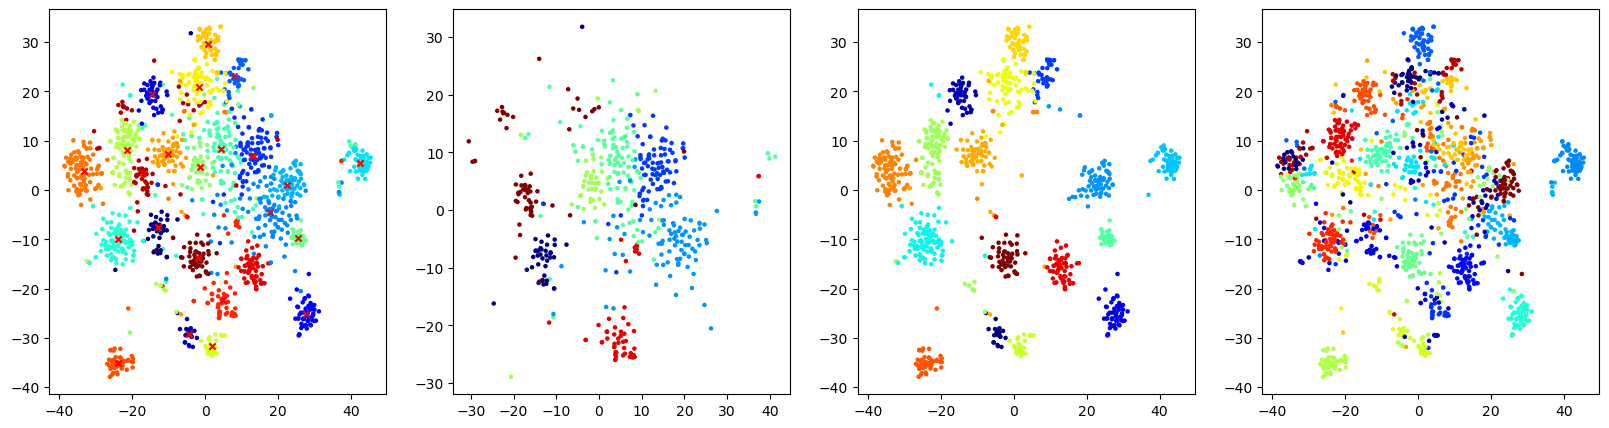

In [12]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples

n_clusters = 24

X = X_tsne[:-len(centers)]
c = X_tsne[-len(centers):]

# 各クラスタ毎に色分けし可視化
fig, ax = plt.subplots(1, 4, figsize=(20, 5))
ax[0].scatter(X[:, 0], X[:, 1], s=5, c=kmeans.labels_, cmap='jet')
# 各クラスタの中心をプロット
ax[0].scatter(c[:, 0], c[:, 1], s=20, c='red', marker='x')

# シルエットスコアが0.5以上のクラスタのみを可視化
cluster_silhouette_scores = {i: silhouette_values[kmeans.labels_ == i].mean() for i in range(n_clusters)}
low_silhouette_clusters = [k for k, v in cluster_silhouette_scores.items() if v <= 0.05]
low_silhouette_idx = np.where(np.isin(kmeans.labels_, low_silhouette_clusters))[0]
ax[1].scatter(X[low_silhouette_idx, 0], X[low_silhouette_idx, 1], s=5, c=kmeans.labels_[low_silhouette_idx], cmap='jet')

high_silhouette_clusters = [k for k, v in cluster_silhouette_scores.items() if v > 0.05]
high_silhouette_idx = np.where(np.isin(kmeans.labels_, high_silhouette_clusters))[0]
ax[2].scatter(X[high_silhouette_idx, 0], X[high_silhouette_idx, 1], s=5, c=kmeans.labels_[high_silhouette_idx], cmap='jet')

ax[3].scatter(X[:, 0], X[:, 1], s=5, c=img_labels ,cmap='jet')

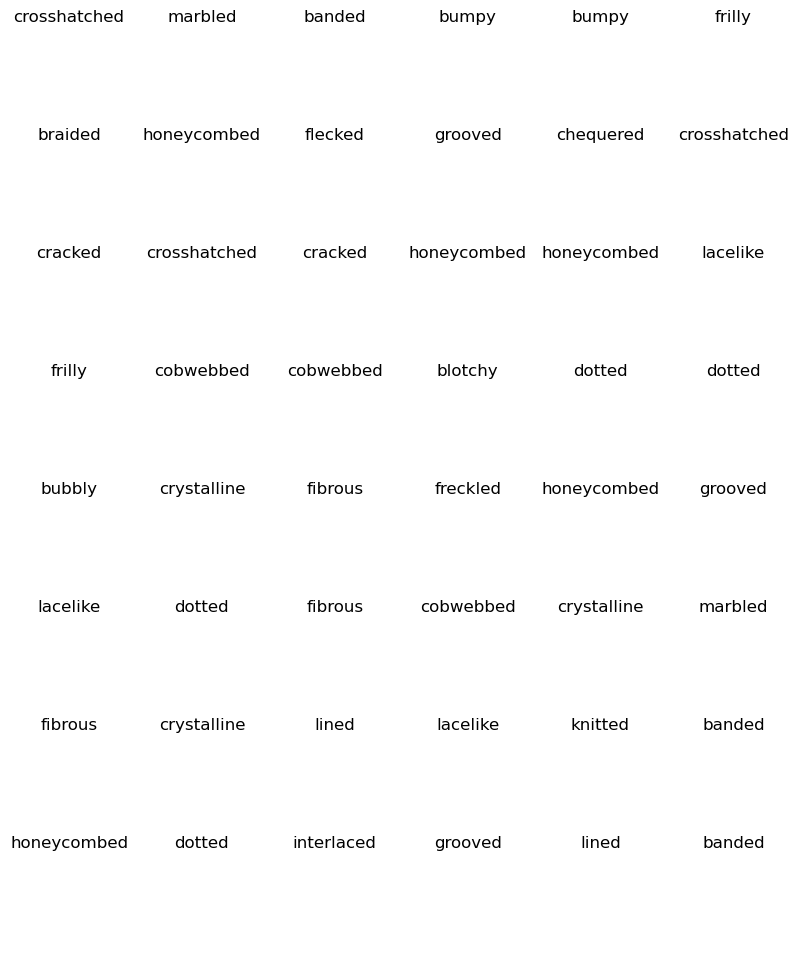

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pathlib import Path

query_impath = "output/base2new/train_base/dtd/shots_-1/ALVLM_CoCoOp_random/vit_b16_one_time_miru2025/seed5/query_impath.txt"
#query_impath = "output/base2new/train_base/dtd/shots_-1/ALVLM_CoCoOp_entropy/vit_b16_one_time_miru2025/seed5/query_impath.txt"
num_class = 24

with open(query_impath, "r") as f:
    query_impath = f.readlines()
query_impath = [q.strip() for q in query_impath]
query_impath_by_round = [query_impath[i:i+num_class] for i in range(0, len(query_impath), num_class)]


# Visualize images by each round
fig, axs = plt.subplots(8, 6, figsize=(10, 12))
axs = axs.ravel()
for i, query_impath in enumerate(query_impath_by_round[:2]):
    for j, q in enumerate(query_impath):
        # resize images to 224x224
        img = cv2.imread(q)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))

        #axs[i*num_class+j].imshow(img)
        axs[i*num_class+j].axis("off")
        name = Path(q).stem.split("_")[0]
        axs[i*num_class+j].set_title(name)

24.0
48.0
72.0
96.0


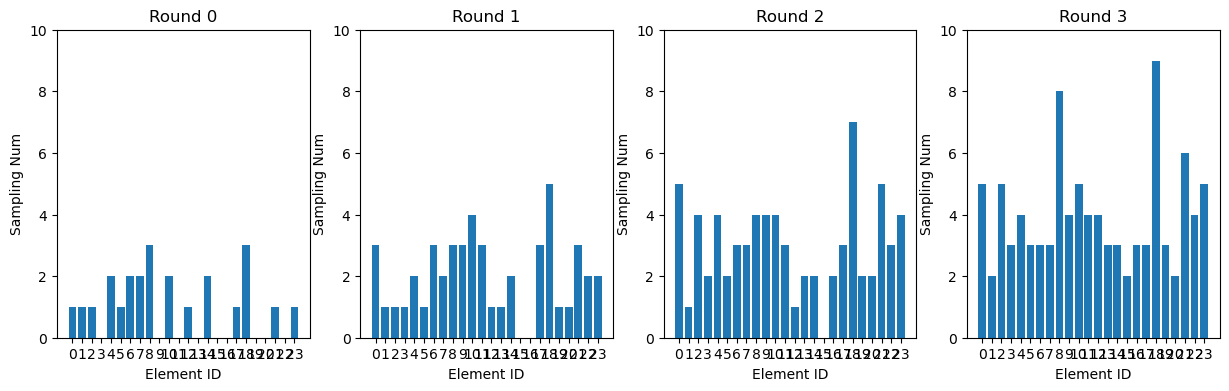

In [ ]:
sampling={0: [1., 1., 1., 0., 2., 1., 2., 2., 3., 0., 2., 0., 1., 0., 2., 0., 0., 1.,
        3., 0., 0., 1., 0., 1.],
    1: [3., 1., 1., 1., 2., 1., 3., 2., 3., 3., 4., 3., 1., 1., 2., 0., 0., 3.,
        5., 1., 1., 3., 2., 2.],
        2: [5., 1., 4., 2., 4., 2., 3., 3., 4., 4., 4., 3., 1., 2., 2., 0., 2., 3.,
        7., 2., 2., 5., 3., 4.],
        3: [5., 2., 5., 3., 4., 3., 3., 3., 8., 4., 5., 4., 4., 3., 3., 2., 3., 3.,
        9., 3., 2., 6., 4., 5.]}

# make bar plot
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
axs = axs.ravel()
for i, (round, sampling_num) in enumerate(sampling.items()):
    print(sum(sampling_num))
    axs[i].bar(range(24), sampling_num, tick_label=range(24))
    axs[i].set_title(f"Round {round}")
    axs[i].set_xlabel('Element ID')
    axs[i].set_ylabel('Sampling Num')

    axs[i].set_ylim(0, 10)

In [18]:
from clip import clip
import torch

url = clip._MODELS["ViT-B/16"]
model_path = clip._download(url)
#state_dict = torch.load(model_path, map_location="cpu")
model = torch.jit.load(model_path, map_location="cpu").eval()
state_dict = None
design_details = {"trainer": 'CoOp',
                "vision_depth": 0,
                "language_depth": 0, "vision_ctx": 0,
                "language_ctx": 0,}
model = clip.build_model(state_dict or model.state_dict(), design_details)
model = model.to("cuda")
model.eval()

CLIP(
  (visual): VisionTransformer(
    (conv1): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16), bias=False)
    (ln_pre): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
    (transformer): Transformer(
      (resblocks): Sequential(
        (0): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (ln_1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): Sequential(
            (c_fc): Linear(in_features=768, out_features=3072, bias=True)
            (gelu): QuickGELU()
            (c_proj): Linear(in_features=3072, out_features=768, bias=True)
          )
          (ln_2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
        )
        (1): ResidualAttentionBlock(
          (attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          

In [ ]:
import torchvision.transforms as transforms
from PIL import Image

def preprocess(image: Image.Image) -> torch.Tensor:
    preprocess = transforms.Compose([
        transforms.Resize(256, interpolation=Image.BICUBIC),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=(0.48145466, 0.4578275, 0.40821073),
            std=(0.26862954, 0.26130258, 0.27577711)
        )
    ])
    return preprocess(image)

def calculate_img_features(img_paths: list) -> torch.Tensor:
    img_features = []
    for img_path in img_paths:
        image = Image.open(img_path).convert("RGB")
        image_input = preprocess(image).unsqueeze(0).to("cuda")
        img_features.append(model.encode_image(image_input))
    return torch.stack(img_features).squeeze().cuda()

impaths = ["clip/dog.jpg", "clip/cat.jpg", "clip/bird.jpg", "clip/monkey.jpg"]

positive_categories = ["dog", "cat", "monkey"]
negative_category = ["This is not a dog, cat, or bird."]
categories = positive_categories + negative_category
print(categories)
text_inputs = clip.tokenize(categories).to("cuda")

text_features = model.encode_text(text_inputs)
text_features /= text_features.norm(dim=-1, keepdim=True)

image_features = calculate_img_features(impaths)
image_features /= image_features.norm(dim=-1, keepdim=True)

similarities = (image_features @ text_features.T).squeeze(0)
similarities

['dog', 'cat', 'monkey', 'This is not a dog, cat, or monkey.']


tensor([[0.2756, 0.2246, 0.2281, 0.2539],
        [0.2074, 0.2727, 0.2166, 0.2539],
        [0.1835, 0.1805, 0.1609, 0.2008],
        [0.1914, 0.1742, 0.2749, 0.2659]], device='cuda:0',
       dtype=torch.float16, grad_fn=<SqueezeBackward1>)

/home/yhiro/miniconda3/envs/dassl/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(-86.69490776062011, 73.2292324066162, -61.051364517211915, 57.91063270568848)

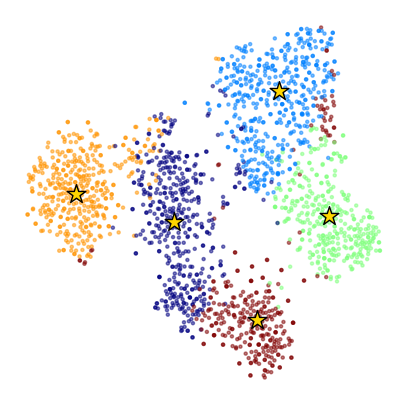

In [85]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import random
import torch

def set_random_seed(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

path_imgfeats = "output/img_features_eurosat.pkl"
path_imgpreds = "output/img_preds_eurosat.pkl"
path_imglabels = "output/img_labels_eurosat.pkl"

set_random_seed(0)

with open(path_imgfeats, "rb") as f:
    img_features = pickle.load(f)
with open(path_imgpreds, "rb") as f:
    img_preds = pickle.load(f)
with open(path_imglabels, "rb") as f:
    img_labels = pickle.load(f)
img_features = torch.stack(img_features).reshape(-1, 512)
img_features = img_features.detach().cpu().numpy()
img_features = random.choices(img_features, k=2000)
img_features = np.array(img_features)

img_preds = torch.stack(img_preds).reshape(-1).detach().cpu().numpy()
img_labels = torch.stack(img_labels).reshape(-1).detach().cpu().numpy()

kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(img_features)

centers = kmeans.cluster_centers_

def nearest_center(features, centers):
    distances = np.linalg.norm(features[:, np.newaxis] - centers, axis=2)
    assert len(distances) == len(features)
    return np.argmin(distances, axis=1)

# search img_features index which is nearest to the center
nearest_center_idx = nearest_center(img_features, centers)

# centers = []
# for i in range(5):
#     centers.append(random.choice(img_features[kmeans.labels_ == i]))
# centers = np.array(centers)

# t-SNE
features = np.vstack([img_features, centers])

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(features)

X = X_tsne[:-len(centers)]
c = X_tsne[-len(centers):]


fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(X[:, 0], X[:, 1], s=5, c=kmeans.labels_, cmap='jet', alpha=0.5)
ax.scatter(c[:, 0], c[:, 1], s=200, c='gold', marker='*', edgecolors="k")
ax.axis('off')


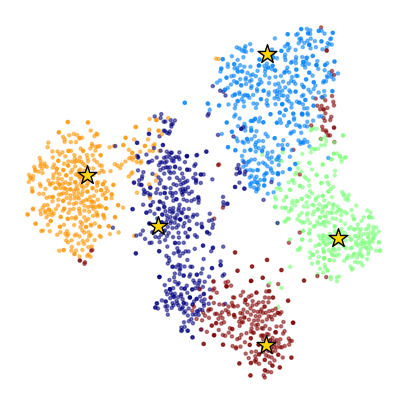

In [132]:
#kmeans = KMeans(n_clusters=5, random_state=42)
#kmeans.fit(img_features)
def nearest_center(features, centers):
    distances = np.linalg.norm(features[:, np.newaxis] - centers, axis=2)
    assert len(distances) == len(features)
    return np.argmin(distances, axis=1)

nearest_center_idx = nearest_center(img_features, centers)
nearest_center_idx = np.array([2, 50, 200, 300, 620]) # 550
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

# ax[0].scatter(X[:, 0], X[:, 1], s=5, c=img_labels, cmap='jet')
# ax[0].set_title("(i) Ground Truth")
# ax[0].axis('off')
# ax[1].scatter(X[:, 0], X[:, 1], s=5, c=img_preds, cmap='jet')
# ax[1].set_title("(ii) Zero-shot predictions")
# ax[1].axis('off')
ax.scatter(X[:, 0], X[:, 1], s=5, c=kmeans.labels_, cmap='jet', alpha=0.5)
#ax.scatter(X[:, 0], X[:, 1], s=5, c="gray", cmap='jet', alpha=0.5)
# plot centroids
ax.scatter(X[nearest_center_idx, 0], X[nearest_center_idx, 1], s=200, c='gold', marker='*', edgecolors="k")
#ax.set_title("KMeans Clustering")
ax.axis('off')

#save plot as svg
plt.savefig("output/tsne_plot_7round.svg")

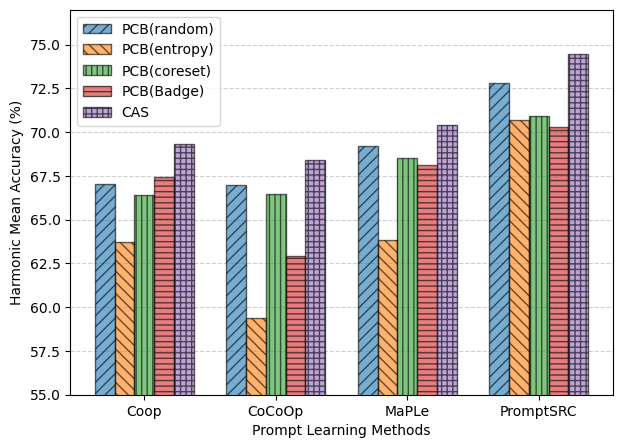

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# データの定義
methods = ["Coop", "CoCoOp", "MaPLe", "PromptSRC"]
strategies = ["PCB(random)", "PCB(entropy)", "PCB(coreset)", "PCB(Badge)", "CAS"]
values = np.array([
    [67.02, 63.72, 66.39, 67.45, 69.3],
    [66.99, 59.36, 66.45, 62.92, 68.39],
    [69.20, 63.83, 68.5, 68.1, 70.39],
    [72.8, 70.69, 70.95, 70.32, 74.49]
])

# プロットの設定
x = np.arange(len(methods))  # X軸の位置
width = 0.15  # バーの幅

fig, ax = plt.subplots(figsize=(7,5))

# 各戦略の棒グラフを描画
cmap = plt.get_cmap("tab10")
patterns = [ "/" , "\\" , "|" , "-" , "+" , "x", "o", "O", ".", "*" ]
for i, strategy in enumerate(strategies):
    ax.bar(x + i * width - (2 * width), values[:, i], width, label=strategy, color=cmap(i), 
           alpha=0.6, edgecolor="black", zorder=2, hatch=patterns[i]*3)

# 軸ラベルとタイトル
ax.set_xlabel("Prompt Learning Methods")
ax.set_ylabel("Harmonic Mean Accuracy (%)")
#ax.set_title("Comparison of Active Learning Strategies")
ax.set_xticks(x)
ax.set_xticklabels(methods)
ax.set_ylim(55, 77)
# グリッド
ax.grid(axis="y", linestyle="--", alpha=0.6, zorder=0)
# グラフの外側に凡例を表示
#ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.legend(loc='upper left')

# グラフの表示
#plt.show()
plt.savefig("output/oneshot.svg")


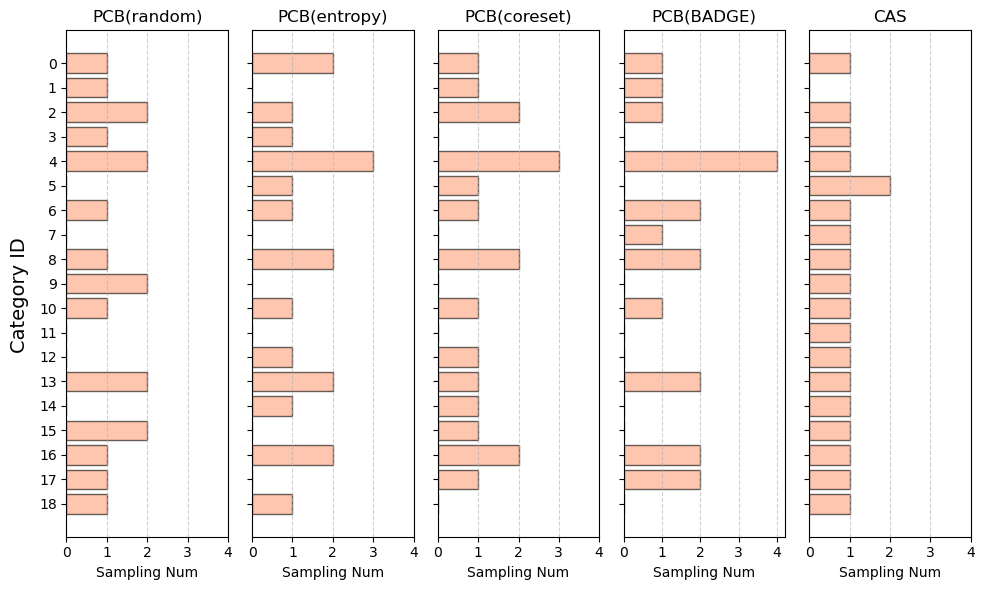

In [35]:
# 環境がリセットされたため、ライブラリの再インポートとデータの再定義
import matplotlib.pyplot as plt

# データの再定義
element_id = list(range(19))
random = [1, 1, 2, 1, 2, 0, 1, 0, 1, 2, 1, 0, 0, 2, 0, 2, 1, 1, 1]
entropy = [2, 0, 1, 1, 3, 1, 1, 0, 2, 0, 1, 0, 1, 2, 1, 0, 2, 0, 1]
coreset = [1, 1, 2, 0, 3, 1, 1, 0, 2, 0, 1, 0, 1, 1, 1, 1, 2, 1, 0]
badge = [1, 1, 1, 0, 4, 0, 2, 1, 2, 0, 1, 0, 0, 2, 0, 0, 2, 2, 0]
cas = [1, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

assert sum(random) == sum(entropy) == sum(coreset) == sum(badge) == sum(cas)

all = random + entropy + coreset + badge + cas

# 縦型の棒グラフを作成 (カテゴリIDを整数のみに設定)
fig, axs = plt.subplots(1, 5, figsize=(10, 6), sharey=True)

# 各手法のデータをプロット
methods = [random, entropy, coreset, badge, cas]
titles = ["PCB(random)", "PCB(entropy)", "PCB(coreset)", "PCB(BADGE)", "CAS"]

for i, (method, title) in enumerate(zip(methods, titles)):
    axs[i].barh(element_id, method, color='lightsalmon', edgecolor='black', alpha=0.6)
    axs[i].set_title(title, fontsize=12)
    axs[i].set_xlabel('Sampling Num')
    axs[i].set_xticks(range(0, max(all) + 1))
    axs[i].set_yticks(element_id)  # カテゴリIDを整数のみに設定
    axs[i].invert_yaxis()  # 上から下へ並ぶように調整
    axs[i].grid(axis='x', linestyle='--', alpha=0.6)

# 共通のY軸ラベル
fig.supylabel('Category ID', fontsize=14)

plt.tight_layout()
#plt.show()
plt.savefig("output/bar_plot.svg")

In [13]:
a=[1, 2, 3, 4, 5]
b=[5, 4, 3, 3, 1]

len(a) == len(set(b))

False